# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(json.dumps(city_weather, indent = 4))
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | lata
Processing Record 3 of Set 1 | katsuura
Processing Record 4 of Set 1 | san antonio de pale
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | whitehorse
Processing Record 10 of Set 1 | rothwell
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | benavente
Processing Record 13 of Set 1 | kismayo
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | wewak
Processing Record 16 of Set 1 | pangai
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | luderitz
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | ilula
Processing Record 21 of Set 1 | okhotsk
Processing Record 22 of Set 1 | taiohae
City not found. Skippi

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,-2.74,87,94,9.84,GL,1684821310
1,lata,40.1629,-8.3327,13.84,86,81,2.63,PT,1684821311
2,katsuura,35.1333,140.3000,15.16,92,100,10.77,JP,1684821311
3,san antonio de pale,-1.4014,5.6325,25.84,79,84,4.48,GQ,1684821311
4,invercargill,-46.4000,168.3500,10.49,88,99,7.15,NZ,1684821312


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-2.74,87,94,9.84,GL,1684821310
1,lata,40.1629,-8.3327,13.84,86,81,2.63,PT,1684821311
2,katsuura,35.1333,140.3000,15.16,92,100,10.77,JP,1684821311
3,san antonio de pale,-1.4014,5.6325,25.84,79,84,4.48,GQ,1684821311
4,invercargill,-46.4000,168.3500,10.49,88,99,7.15,NZ,1684821312


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

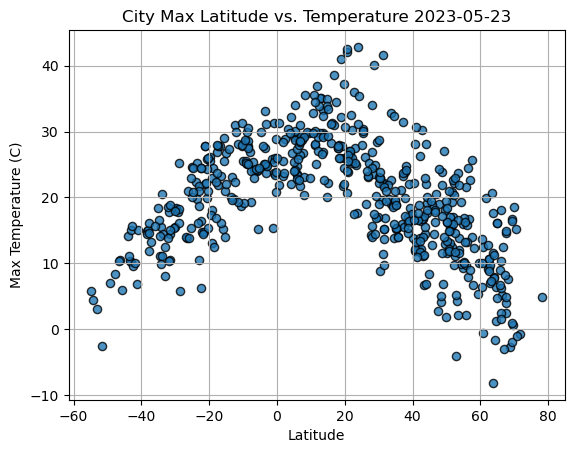

In [10]:
#import date format dependency & create variable for date in title
import datetime as dt
current_date = dt.datetime.today().strftime("%Y-%m-%d")

# Build scatter plot for latitude vs. temperature
lat_temp_scatter = city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", edgecolor="black", s=35, alpha=0.8)

# Incorporate the other graph properties
plt.grid(True)
plt.title(f"City Max Latitude vs. Temperature {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

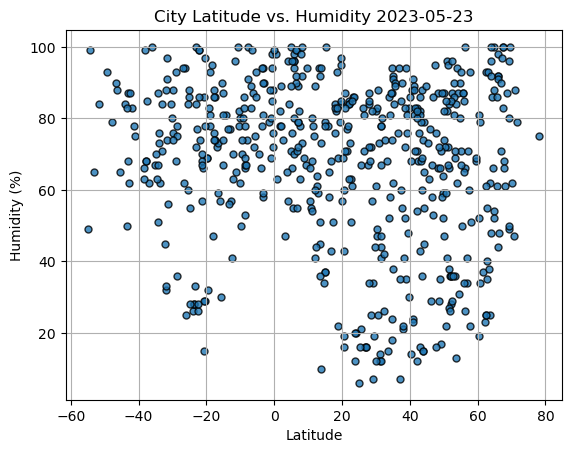

In [11]:
# Build the scatter plots for latitude vs. humidity
lat_hum_scatter = city_data_df.plot(kind="scatter", x="Lat", y="Humidity", edgecolor="black", s=25, alpha =0.8)

# Incorporate the other graph properties
plt.grid(True)
plt.title(f"City Latitude vs. Humidity {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

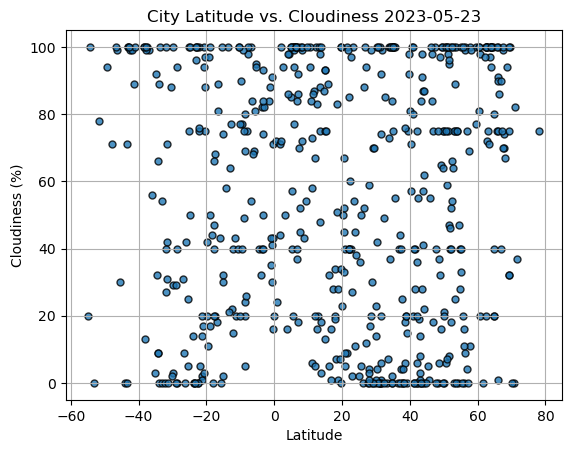

In [12]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloud_scatter = city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", edgecolor="black", s=25, alpha =0.8)

# Incorporate the other graph properties
plt.grid(True)
plt.title(f"City Latitude vs. Cloudiness {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

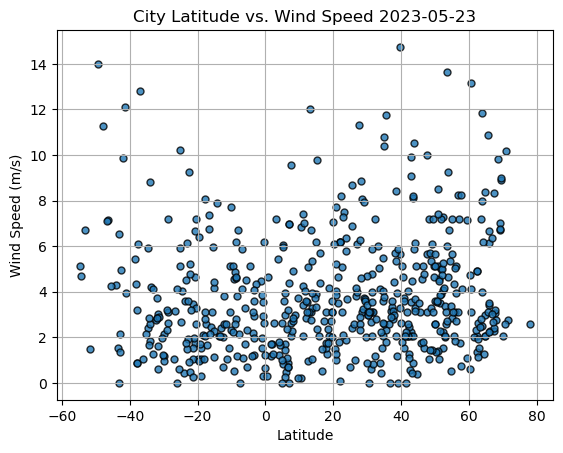

In [13]:
# Build the scatter plots for latitude vs. wind speed
lat_cloud_scatter = city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", edgecolor="black", s=25, alpha =0.8)

# Incorporate the other graph properties
plt.grid(True)
plt.title(f"City Latitude vs. Wind Speed {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots


def line_regress(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    #calculate position for annotating line equation
    x_pos = min(x_values) + 0.1 * (max(x_values) - min(x_values))
    y_pos = min(y_values) + 0.9 * (max(y_values) - min(y_values))
    plt.annotate(line_eq,(x_pos, y_pos),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is: {rvalue}")



In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-2.74,87,94,9.84,GL,1684821310
1,lata,40.1629,-8.3327,13.84,86,81,2.63,PT,1684821311
2,katsuura,35.1333,140.3000,15.16,92,100,10.77,JP,1684821311
6,hawaiian paradise park,19.5933,-154.9731,21.73,97,100,3.09,US,1684821312
8,whitehorse,60.7161,-135.0538,12.43,34,20,3.09,CA,1684821313


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,san antonio de pale,-1.4014,5.6325,25.84,79,84,4.48,GQ,1684821311
4,invercargill,-46.4000,168.3500,10.49,88,99,7.15,NZ,1684821312
5,port-aux-francais,-49.3500,70.2167,7.00,93,94,13.97,TF,1684821312
7,adamstown,-25.0660,-130.1015,24.56,86,100,10.20,PN,1684821312
12,kismayo,-0.3582,42.5454,28.91,72,43,6.19,SO,1684821039


###  Temperature vs. Latitude Linear Regression Plot

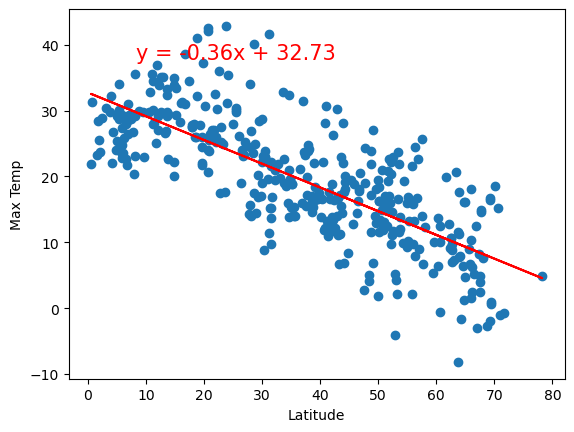

The r-value is: -0.7578500368096519


In [28]:
# Linear regression on Northern Hemisphere
line_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")
   


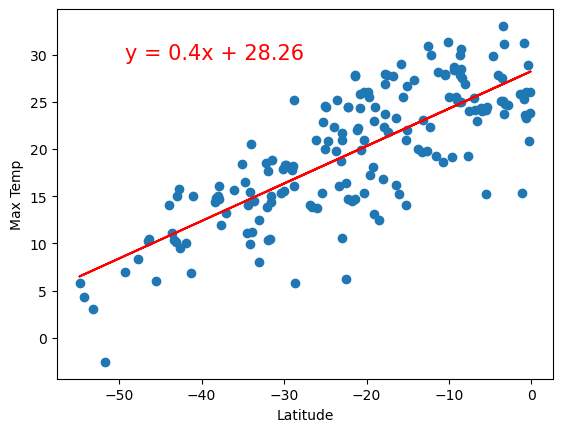

The r-value is: 0.7785532702854917


In [29]:
# Linear regression on Southern Hemisphere
line_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")
   

**Discussion about the linear relationship:** 
The plots above display how the max temperature of given cities are affected and by their position in relation to the equator. The northern hemisphere plot shows a very strong relationship between the temperature decreasing the farther away from the equator (latitude of 0), the opposite is true with the Southern hemisphere plot. The closer the position of the city to the equator the warmer the temperature. The respective r-values so close to 1 and -1 prove these strong relationships. Given this modeling, one could make fairly accurate predictions to the temperature of a city if you knew its latitude or vice versa, knowing the max temperature and predictiing its approximate latitude. Summizing that the closer to the equator a city is the warmer its temperature will be and the farther away, the colder the city will be.
## NOTE: 
Each time this script is ran the np.random Numpy module produces new random cities inside the latitude and longitude parameters. Changing the data points in each plot and likely the linear regression line to a varying degree.


### Humidity vs. Latitude Linear Regression Plot

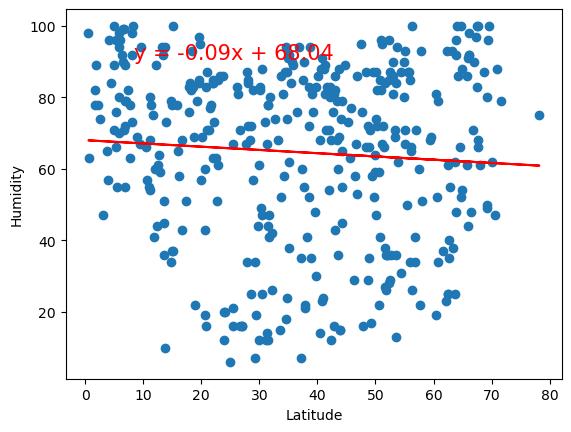

The r-value is: -0.07108036740045989


In [30]:
# Northern Hemisphere
line_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

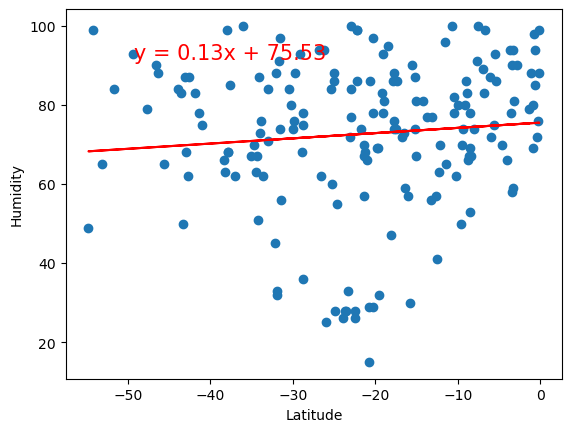

The r-value is: 0.0940086680286722


In [31]:
# Southern Hemisphere
line_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** 
Given the data modeled in the two plots above, the conclusion I would come to is that the relationship between position in regards to the equator and humidity is very small. The small angles of the regression lines and corresponding r-values prove this both visually and statistically. Although it is important to note a few points when analyzing these plots. There is scientically proven relationship between average temperature and humidity e.g: tropical areas, rainforests etc. are humid climates and found closer to the equator. As well the fact that the cities used in this data are randomly generated. Different combinations of cities could produce different modeling and subsequent correlation values.
# NOTE: 
Each time this script is ran the np.random Numpy module produces new random cities inside the latitude and longitude parameters. Changing the data points in each plot and likely the linear regression line to a varying degree.

### Cloudiness vs. Latitude Linear Regression Plot

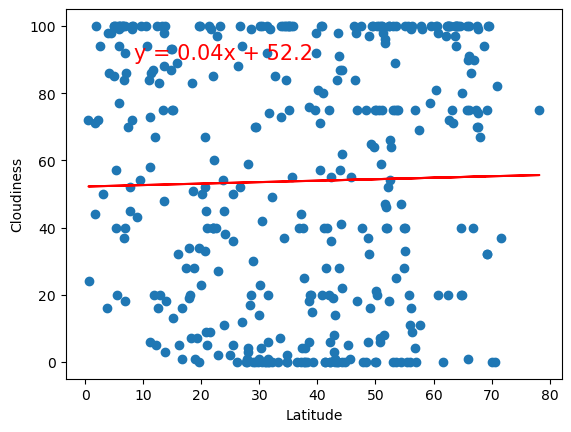

The r-value is: 0.022374628894823348


In [32]:
# Northern Hemisphere
line_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

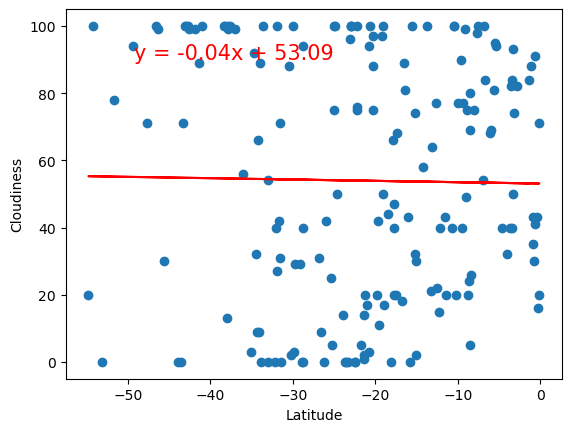

The r-value is: -0.01467021682698084


In [33]:
# Southern Hemisphere
line_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** 
Based on the two plots modeling the relationship between cloudiness and proximity to the equator we can see that the correlation strength between these two is very weak. With r-values so close to zero I can summize that based on the visualized data there is no correlation to cloud concentration the more north a city is positioned and practically none or a very week correlation to cities in the southern hemisphere as they get closer to the equator. In conclusion based on the data used, the cloudiness of a city or small geographical area is generally not affected by it's proximity to the equator.
## NOTE 
Each time this script is ran the np.random Numpy module produces new random cities inside the latitude and longitude parameters. Changing the data points in each plot and likely the linear regression line to a varying degree.

### Wind Speed vs. Latitude Linear Regression Plot

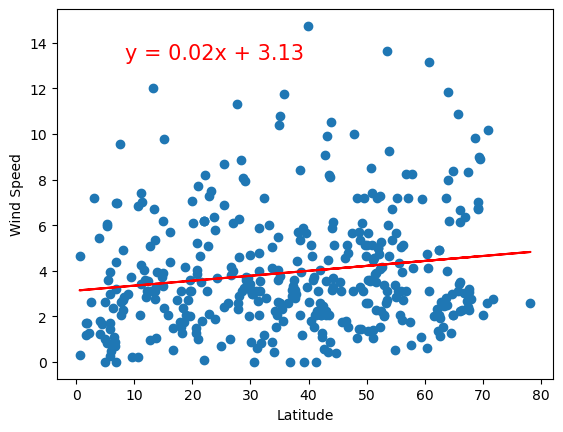

The r-value is: 0.16099643422497897


In [34]:
# Northern Hemisphere
line_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

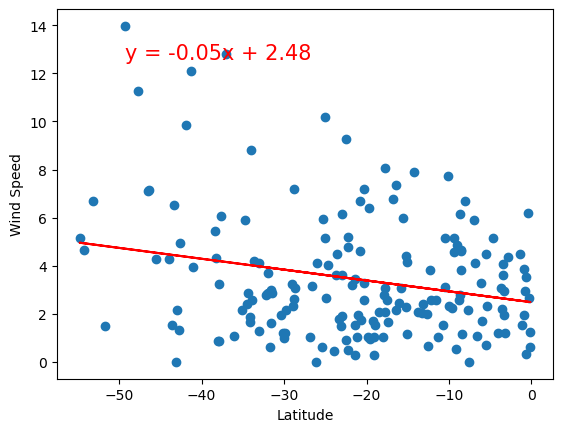

The r-value is: -0.2390916820991384


In [35]:
# Southern Hemisphere
line_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** 
Given the data modeled in the two plots showcasing the northern and southern hemisphere wind speed the correlation between these two can be categorized as weak. With a slight positive r-value for the northern hemisphere and slight negative for the southern hemisphere only a small relationship between latitude and wind speed can be recognized. As the two plots do exhibit wind speed slightly decreasing as latitude approaches zero, I can conclude that generally speaking wind speed tends to slightly decrease towards the equator and increase slightly away from it.
## NOTE 
Each time this script is ran the np.random Numpy module produces new random cities inside the latitude and longitude parameters. Changing the data points in each plot and likely the linear regression line to a varying degree.